<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Estimated_total_number_of_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv",\
                         index_col='date')
deaths_raw = deaths_raw.fillna(method='pad')
deaths_raw = deaths_raw.fillna(0)

In [0]:
# Tipping point deaths
TP_deaths = 10

In [0]:
list_countries = ["China", "France", "Italy", "United Kingdom"]

In [0]:
deaths = {}
for country in list_countries:
  deaths[country] = deaths_raw[country][deaths_raw[country] > TP_deaths]

In [0]:
growth_rate_deaths = {}
for country in list_countries:
  aux = deaths[country]
  growth_rate_deaths[country] = [t/s for s, t in zip(aux, aux[1:]) if s is not 0]

In [0]:
# Window size deaths
WS_deaths = 3

In [0]:
rolling_deaths_mean = pd.Series()
for country in list_countries:
  grd = pd.Series(growth_rate_deaths[country])
  rolling_grd = grd.rolling(window=WS_deaths)
  rolling_deaths_mean[country] = rolling_grd.mean()

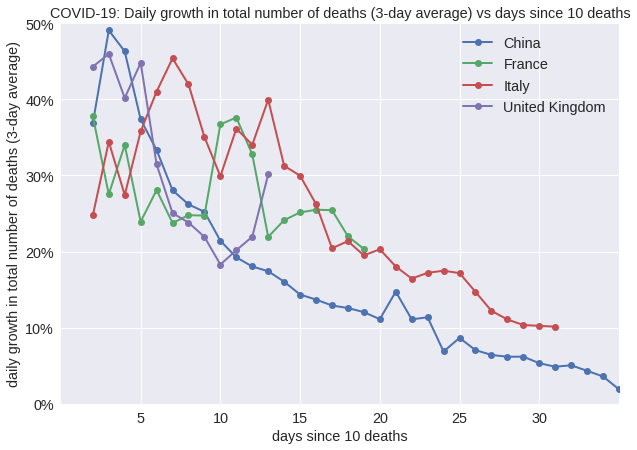

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  ax.plot(rolling_deaths_mean[country], label=country, linewidth=2, marker='o')

ax.set_xticks(np.arange(5,len(rolling_deaths_mean["Italy"]),5))
ax.set_xticklabels(np.arange(5,len(rolling_deaths_mean["Italy"]),5), fontsize='x-large')
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'], fontsize='x-large')
plt.title(f"COVID-19: Daily growth in total number of deaths ({WS_deaths}-day average) vs days since {TP_deaths} deaths", fontsize='x-large')
plt.xlabel(f"days since {TP_deaths} deaths", fontsize='x-large')
plt.ylabel(f"daily growth in total number of deaths ({WS_deaths}-day average)", fontsize='x-large')
plt.legend(fontsize='x-large')
plt.ylim(1.0,1.5)
plt.xlim(0,35)
plt.show()

In [0]:
# Closest to China's plot
aux = rolling_deaths_mean["China"][7:]

In [0]:
future_deaths_UK = pd.Series()
future_deaths_UK[pd.to_datetime(deaths["United Kingdom"].tail(1).keys()[0])] = deaths["United Kingdom"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_UK[(pd.to_datetime(deaths["United Kingdom"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_UK.iloc[i]*aux.iloc[i]

In [12]:
future_deaths_UK

2020-03-29 00:00:00     1019.000000
2020-03-30              1304.932685
2020-03-31              1646.869843
2020-04-01              2062.310551
2020-04-02              2504.091012
                           ...     
2020-05-24             32416.361876
2020-05-25             32472.339775
2020-05-26             32521.720925
2020-05-27             32567.830082
2020-05-28             32610.631886
Length: 61, dtype: float64

In [0]:
aux = rolling_deaths_mean["China"][25:]

In [14]:
pd.to_datetime(deaths["Italy"].tail(1).keys()[0]).strftime('%Y-%m-%d')

'2020-03-29'

In [0]:
future_deaths_IT = pd.Series()
future_deaths_IT[pd.to_datetime(deaths["Italy"].tail(1).keys()[0]).strftime('%Y-%m-%d')] = deaths["Italy"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_IT[(pd.to_datetime(deaths["Italy"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_IT.iloc[i]*aux.iloc[i]

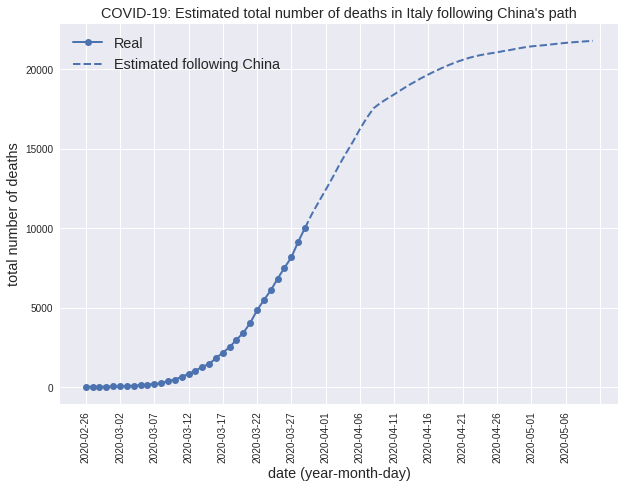

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(deaths["Italy"], linewidth=2, color='C0', label='Real', marker='o')
plt.plot(future_deaths_IT, linewidth=2, color='C0', label='Estimated following China', linestyle='dashed')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0, len(deaths['Italy'])+len(future_deaths_IT), 5))
ax.set_title("COVID-19: Estimated total number of deaths in Italy following China's path", fontsize='x-large')
ax.set_xlabel('date (year-month-day)', fontsize='x-large')
ax.set_ylabel('total number of deaths', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.savefig("2020-03-30-Estimated-Italy.png", format='png', dvi=500)

In [0]:
from google.colab import files
files.download("2020-03-30-Estimated-Italy.png")

In [0]:
# Closest to China's plot
aux_FR = rolling_deaths_mean["China"][11:]

In [0]:
future_deaths_FR = pd.Series()
future_deaths_FR[pd.to_datetime(deaths["France"].tail(1).keys()[0]).strftime('%Y-%m-%d')] = deaths["France"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_FR[(pd.to_datetime(deaths["France"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_FR.iloc[i]*aux_FR.iloc[i]

In [19]:
future_deaths_FR

2020-03-29     2314.000000
2020-03-30     2759.219474
2020-03-31     3257.075170
2020-04-01     3824.332787
2020-04-02     4437.916953
2020-04-03     5075.059318
2020-04-04     5769.973550
2020-04-05     6515.336186
2020-04-06     7335.322039
2020-04-07     8218.906107
2020-04-08     9132.981540
2020-04-09    10479.175795
2020-04-10    11641.975425
2020-04-11    12965.506047
2020-04-12    13856.784885
2020-04-13    15056.547892
2020-04-14    16118.220373
2020-04-15    17153.722010
2020-04-16    18214.303377
2020-04-17    19342.428061
2020-04-18    20374.936349
2020-04-19    21367.331650
2020-04-20    22448.585054
2020-04-21    23421.956283
2020-04-22    24263.872868
2020-04-23    24726.186058
2020-04-24    25107.043821
2020-04-25    25471.453495
2020-04-26    25855.275700
2020-04-27    26232.821410
2020-04-28    26564.600143
2020-04-29    26902.544597
2020-04-30    27206.840122
2020-05-01    27505.255403
2020-05-02    27776.128953
2020-05-03    28034.826891
2020-05-04    28272.274721
2

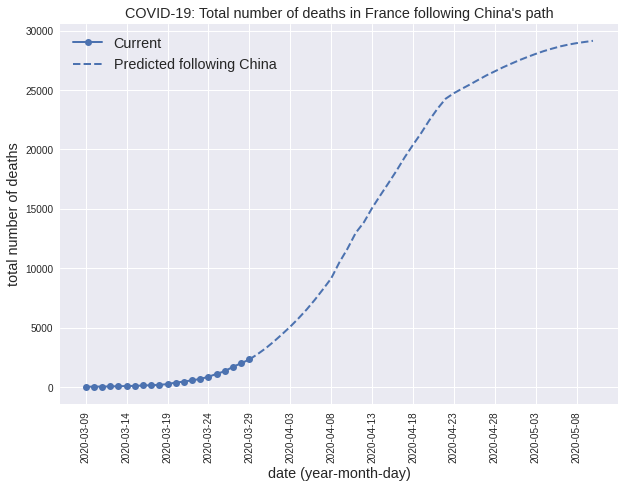

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(deaths["France"], linewidth=2, color='C0', label='Current', marker='o')
plt.plot(future_deaths_FR, linewidth=2, color='C0', label='Predicted following China', linestyle='dashed')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0, len(deaths['France'])+len(future_deaths_FR), 5))
ax.set_title("COVID-19: Total number of deaths in France following China's path", fontsize='x-large')
ax.set_xlabel('date (year-month-day)', fontsize='x-large')
ax.set_ylabel('total number of deaths', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.show()